In [125]:
What_I_am_going_to_learn = {1:"Data (prepare and load)",
                            2:"build model",
                            3:"fitting the model to data (training)",
                            4:"making predictions and evaluting a model (inference)",
                            5:"saving and loading a model",
                            6: "putting it all together"}
What_I_am_going_to_learn

{1: 'Data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [126]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt


## 1. Data (preparing and loading)

Data can be almost anything.. in deep learning.

* Excel speedsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning: a game of two parts
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *know* data using the linear regression formula.

## Linear Regression
the formula basically is
Y = mx + c

`X` is the explanatory variable and `y` is the dependent variable. The slope of the line is `m`, and `c` is the intercept (the value of y when x = 0)

In [127]:
# create *know* parameters

weight = 0.7 # basically the slope `m`
bias = 0.3 # basically `c` in the formula means the intercept

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## Splitting data into trianing and test sets

In [128]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [129]:
# Visualizing the data

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data,train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14});

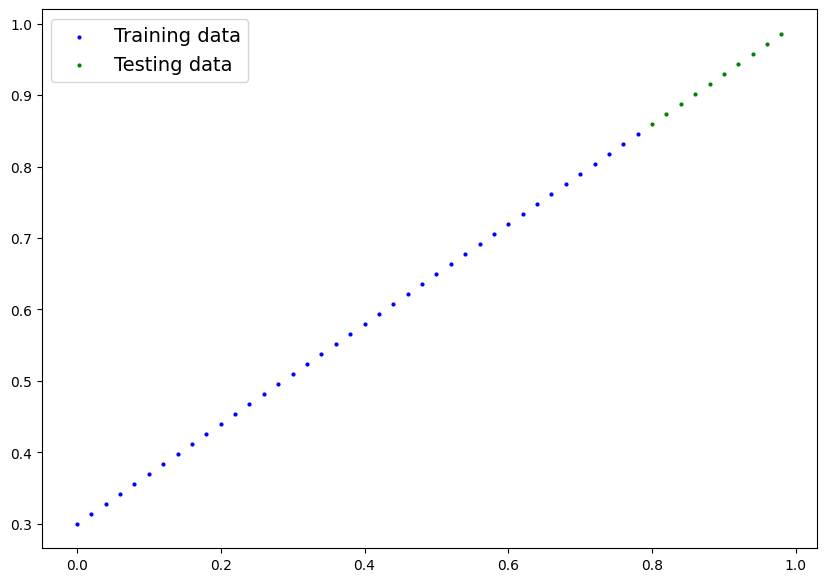

In [130]:
plot_predictions();

## 2. Building a model


What the model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?
Through two main algorithms:
1. Gradient descent
2. Backpropagation


In [131]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
      # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
         return self.weights * x + self.bias # this is the linear regression formula


## Python Class

In [132]:
# circle.py
import math

class Circle:
    def __init__(self, radius):
        self.radius = radius

    def calculate_area(self):
        return round(math.pi * self.radius ** 2, 2)

# from circle import Circle

circle_1 = Circle(42)
circle_2 = Circle(7)
circle_1,circle_2




(<__main__.Circle at 0x7dd233be9690>, <__main__.Circle at 0x7dd233c69210>)

In [133]:
circle_1 = Circle(42)
circle_2 = Circle(7)
circle_1.radius, circle_1.calculate_area(), circle_2.radius,circle_2.calculate_area()

(42, 5541.77, 7, 153.94)

In [134]:
import datetime

class Employee:
  num_of_emps  = 0
  raise_amount = 1.04
  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)

  @classmethod
  def set_raise_amt(cls, amount):
     cls.raise_amount = amount

  @classmethod
  def from_str(cls, emp_str):
    first, last, pay = emp_str.split('-')
    return cls(first, last, pay)

  @staticmethod
  def is_workday(day):
    if day.weekday() == 5 or day.weekday() == 6:
       return False
    return True
  def __repr__(self):
    return f"Employee {self.first} {self.last} {self.pay}"

  def __str__(self):
    return f"{self.fullname()} {self.email}"
  def __add__(self, other):
    return self.pay + other.pay


class Developer(Employee):
  raise_amount = 1.10
  def __init__(self, first, last, pay, prog_lang):
    super().__init__(first, last, pay)
    # Employee.__init__(self, first, last, pay)
    self.prog_lang = prog_lang

class Manager(Employee):
  def __init__(self, first, last, pay,employees=None):
    super().__init__(first, last, pay)
    if employees is None:
      self.employees = []
    else:
      self.employees = employees

  def add_emp(self, emp):
    if emp not in self.employees:
      self.employees.append(emp)
  def remove_emp(self, emp):
    if emp not in self.employees:
      self.employees.remove(emp)

  def print_emp(self):
    for emp in self.employees:
      print(f'-->, {emp.fullname()}')



emp_1 = Employee("Corey", "Schafer", 5000) # instance 1

emp_2 = Employee("Test", "User", 6000) # instance 2

dev_1 = Developer("Corey", "Schafer", 50000, "Python")
dev_2 = Developer("Test", "Employee", 60000, "Java")

mgr_1 = Manager('Sue', 'Smith', 90000, [dev_1])



# emp_1, emp_2

# giving attributes(storing values a for emp_1 into variables)(manually)
# emp_1.first = "Corey"
# emp_1.last = "Schafer"
# emp_1.email = "Corey.Schafer@company.com"
# emp_1.pay = 50000

# emp_2.first = "Test"
# emp_2.last = "user"
# emp_2.email = "test.user@company.com"
# emp_2.pay = 60000

# emp_1.email, emp_2.email, emp_1.fullname(), emp_2.fullname()
# emp_1.apply_raise()

Employee.set_raise_amt(1.05)

# emp_1.raise_amount = 1.05
# emp_1.__dict__, Employee.__dict__, Employee.num_of_emps
# Employee.raise_amount, emp_1.raise_amount, emp_2.raise_amount

emp_str_1 = 'John-Doe-70000'
emp_str_2 = 'Steve-Smith-30000'
emp_str_3 = 'Jane-Doe-80000'

# first, last, pay = emp_str_1.split('-')

# new_emp_1 = Employee(first, last, pay)

new_emp_1 = Employee.from_str(emp_str_2)

# new_emp_1.email, new_emp_1.pay

my_date = datetime.date(2016, 7, 11)

# Employee.is_workday(my_date)

# dev_1.pay, dev_1.apply_raise(), dev_1.pay

# dev_1.email, dev_1.prog_lang
# mgr_1.add_emp(dev_2)
# mgr_1.remove_emp(dev_1)
# mgr_1.email, mgr_1.print_emp()

# isinstance(mgr_1, Developer)
# issubclass(Manager, Developer)

# emp_1
# repr(emp_1)
# str(emp_1)
# emp_1.__repr__()

# int.__add__(1, 3)
# str.__add__('a', "b")

# emp_1 + emp_2

## PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computationl graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent

* def forwarad() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computations.

### Checking the contents of our PyTorch model

we can check our model parameter or what's inside our model using `.parameters()`

In [135]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [136]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction using torch.inference_mode()

In [137]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [138]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

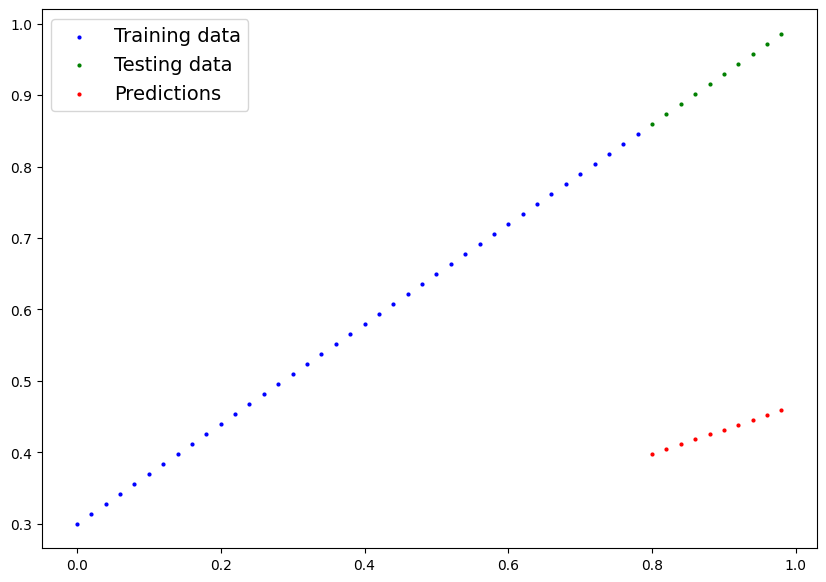

In [139]:
plot_predictions(predictions=y_preds)

## 3. Train model

the whole idea of training fir a model to move from some *unknown* parameters (thse may be random) to some known parameters.

or in other words from a poor representation of the data to a better representation.

one way to measure how poor or how wrong the model's predictions are is to use loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case it is called loss function.

* **Loss function:** A function to measure how wrong the model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g weight & bias) in our case to improve the loss function.
     * Inside cthe optimizer they are two parameters:
         * `params` - the model parameters you'd like to optimize for example,
         `params=model_0.parameters()`
         * `lr(learning rate)` - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with step(a small `lr` results in small changes, a large `lr` results in large changes)

and specifcally for PyTorch, we need:
* A training loop
* A testing loop

In [140]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [141]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [142]:
# setu; a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set


In [143]:
loss_fn

L1Loss()

In [144]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Building a trainig loop and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` fucntion) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the `Loss`(**gradient descent**)


In [145]:
torch.manual_seed(42)
# An epoch is one loop through the data...
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to requires gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumlumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off gradient tracking


Loss: 0.31288138031959534


In [146]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [147]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [148]:
weight, bias

(0.7, 0.3)

In [149]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


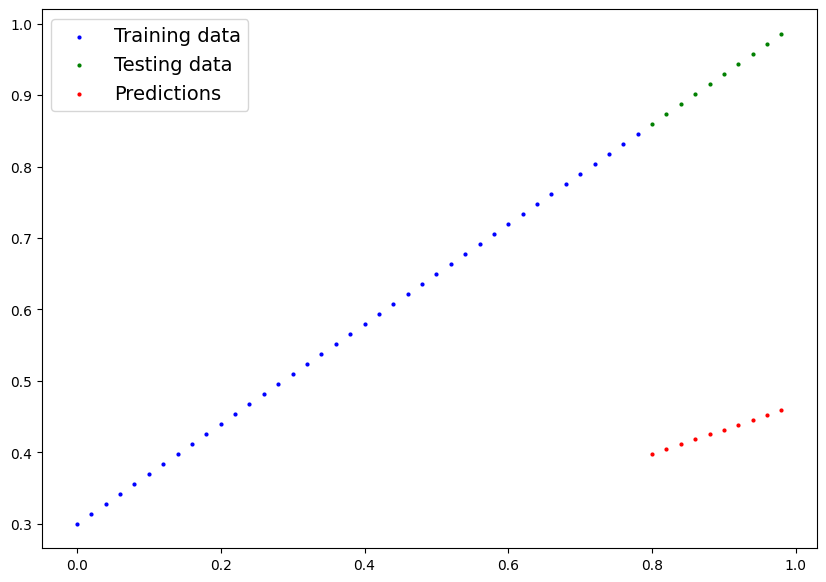

In [150]:
plot_predictions(predictions=y_preds);

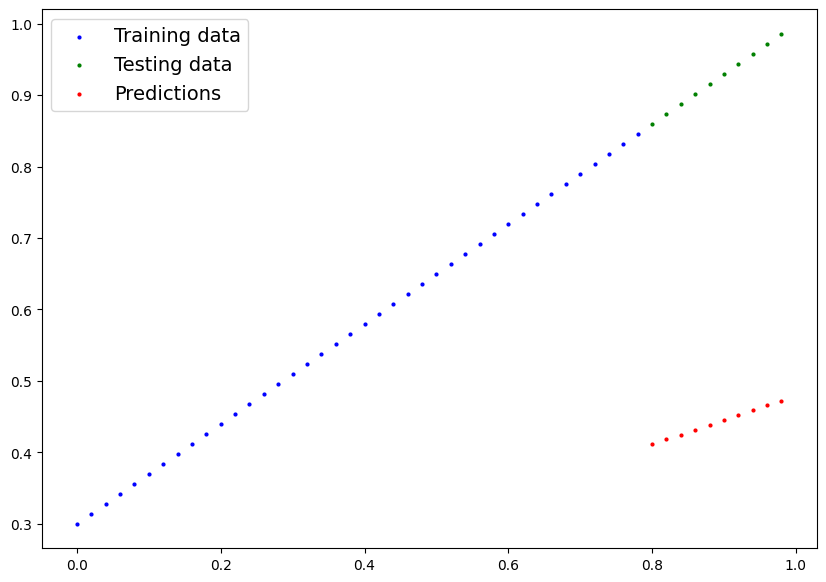

In [151]:
plot_predictions(predictions=y_preds_new);

In [152]:
torch.manual_seed(42)
# An epoch is one loop through the data...
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_value = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to requires gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumlumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/batch norm layers, grediant descent)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
     # 1. Do the forward pass
     test_pred = model_0(X_test)

     # 2. Calculate the loss
     test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_value.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
Epoch: 10 | Loss: 0.18615034222602844 | Test loss: 0.3328842222690582
Epoch: 20 | Loss: 0.08227583020925522 | Test loss: 0.2069590985774994
Epoch: 30 | Loss: 0.05181945487856865 | Test loss: 0.14023718237876892
Epoch: 40 | Loss: 0.04503796249628067 | Test loss: 0.11182951927185059
Epoch: 50 | Loss: 0.04132963344454765 | Test loss: 0.09809747338294983
Epoch: 60 | Loss: 0.03785243630409241 | Test loss: 0.08776430785655975
Epoch: 70 | Loss: 0.03441363573074341 | Test loss: 0.0794917643070221
Epoch: 80 | Loss: 0.030979642644524574 | Test loss: 0.07190609723329544
Epoch: 90 | Loss: 0.02754882536828518 | Test loss: 0.06363357603549957
Epoch: 100 | Loss: 0.024110013619065285 | Test loss: 0.05536102131009102
Epoch: 110 | Loss: 0.020677709951996803 | Test loss: 0.04777535796165466
Epoch: 120 | Loss: 0.017245199531316757 | Test loss: 0.0395028181374073
Epoch: 130 | Loss: 0.013806397095322609 | Test loss: 0.031230276450514793
Epo

In [153]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [154]:
import numpy as np

epoch_count, loss_values, test_loss_value

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3014, grad_fn=<MeanBackward0>),
  tensor(0.1862, grad_fn=<MeanBackward0>),
  tensor(0.0823, grad_fn=<MeanBackward0>),
  tensor(0.0518, grad_fn=<MeanBackward0>),
  tensor(0.0450, grad_fn=<MeanBackward0>),
  tensor(0.0413, grad_fn=<MeanBackward0>),
  tensor(0.0379, grad_fn=<MeanBackward0>),
  tensor(0.0344, grad_fn=<MeanBackward0>),
  tensor(0.0310, grad_fn=<MeanBackward0>),
  tensor(0.0275, grad_fn=<MeanBackward0>),
  tensor(0.0241, grad_fn=<MeanBackward0>),
  tensor(0.0207, grad_fn=<MeanBackward0>),
  tensor(0.0172, grad_fn=<MeanBackward0>),
  tensor(0.0138, grad_fn=<MeanBackward0>),
  tensor(0.0104, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0035, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>),
  tensor(0.0026, grad_fn=<MeanBackward0>)],
 [tensor(

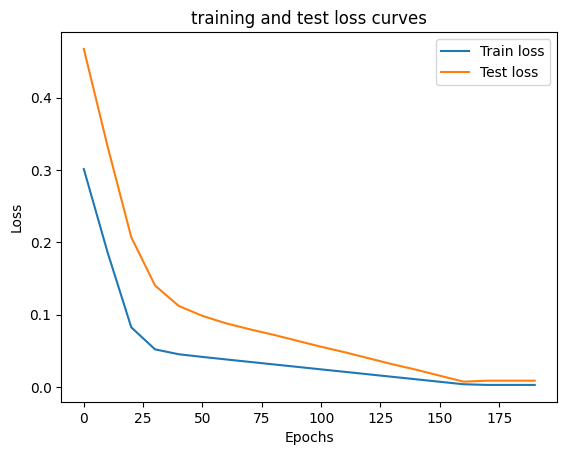

In [155]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [156]:
with torch.inference_mode():
  y_preds_new_2 = model_0(X_test)

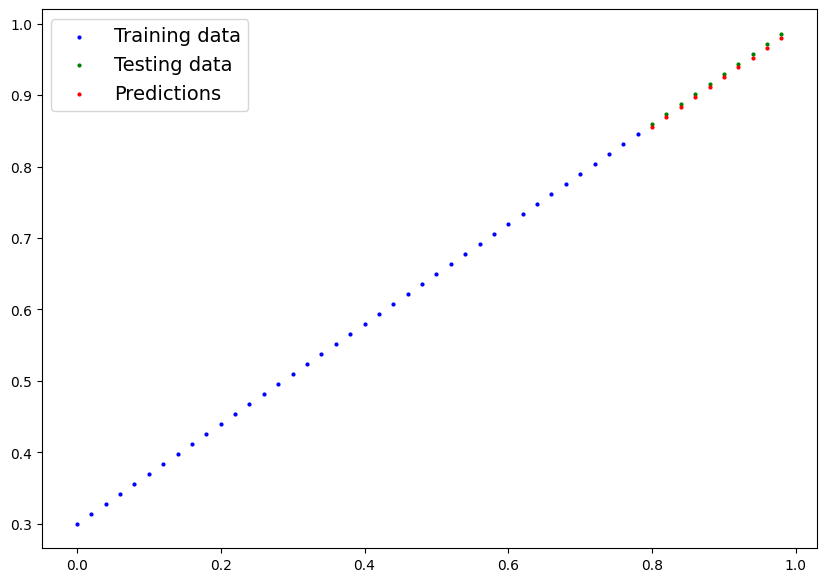

In [157]:
plot_predictions(predictions=y_preds_new_2);

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictinory

In [158]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [159]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [160]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 29 07:26 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

In [161]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameter)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


loaded_model_0.eval()

LinearRegressionModel()

In [162]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [163]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [164]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [165]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [166]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting all together

In [167]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU.

In [168]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f"using device: {device}")

using device: cuda


# 6.1 Data

In [169]:
# Create some data using linear regression formula of Y = mx + c which is know as Y = weight * X + bias
weight = 0.4
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1080],
         [0.1160],
         [0.1240],
         [0.1320],
         [0.1400],
         [0.1480],
         [0.1560],
         [0.1640],
         [0.1720]]))

In [170]:
# split data
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test =X[train_split:], y[train_split:]

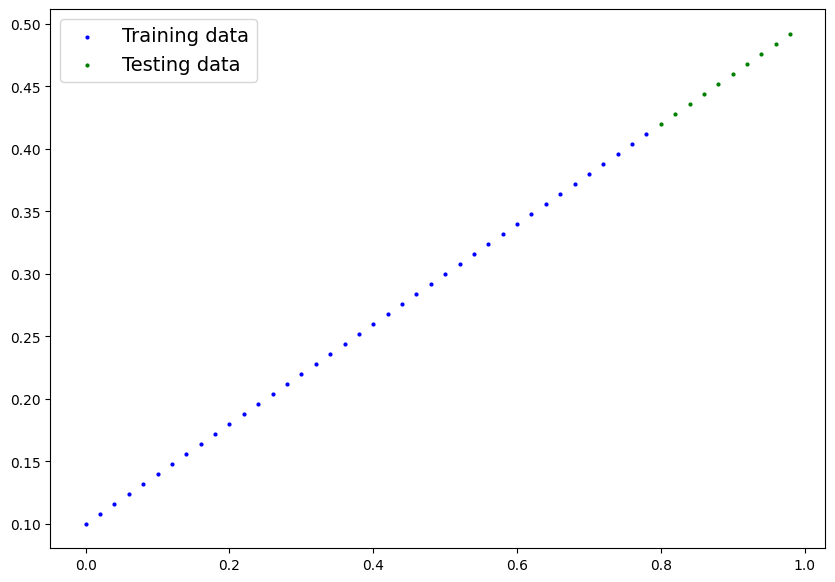

In [171]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [172]:
class LinearRegressionModel_1(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel_1()

In [173]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [174]:
# Set the model to use the target device
model_1.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

for training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [175]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=.01)

In [176]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=.01)

torch.manual_seed(42)
epochs = 200
for epoch in range(epochs):
    model_1.train()
    # 1. Forward pass
    y_preds = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      test_pred = model_1(X_test)
      test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | test_loss: {test_loss}")

Epoch: 0 | Loss: 0.8721778988838196 | test_loss: 1.0409762859344482
Epoch: 10 | Loss: 0.756968080997467 | test_loss: 0.9062663912773132
Epoch: 20 | Loss: 0.641758143901825 | test_loss: 0.771556556224823
Epoch: 30 | Loss: 0.5265483260154724 | test_loss: 0.6368467211723328
Epoch: 40 | Loss: 0.4113384187221527 | test_loss: 0.5021368861198425
Epoch: 50 | Loss: 0.2961285710334778 | test_loss: 0.3674270808696747
Epoch: 60 | Loss: 0.18091867864131927 | test_loss: 0.23271720111370087
Epoch: 70 | Loss: 0.06570865213871002 | test_loss: 0.09800722450017929
Epoch: 80 | Loss: 0.011952430009841919 | test_loss: 0.02744966186583042
Epoch: 90 | Loss: 0.008513589389622211 | test_loss: 0.019177231937646866
Epoch: 100 | Loss: 0.0050748055800795555 | test_loss: 0.01090479176491499
Epoch: 110 | Loss: 0.001640075701288879 | test_loss: 0.0033192397095263004
Epoch: 120 | Loss: 0.008293048478662968 | test_loss: 0.005432430189102888
Epoch: 130 | Loss: 0.008293048478662968 | test_loss: 0.005432430189102888
Epoch:

In [177]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0915], device='cuda:0'))])

In [178]:
weight, bias

(0.4, 0.1)

In [179]:
model_1.eval()
with torch.inference_mode():
  y_preds_new = model_1(X_test)

y_preds_new

tensor([[0.4119],
        [0.4199],
        [0.4279],
        [0.4359],
        [0.4440],
        [0.4520],
        [0.4600],
        [0.4680],
        [0.4760],
        [0.4840]])

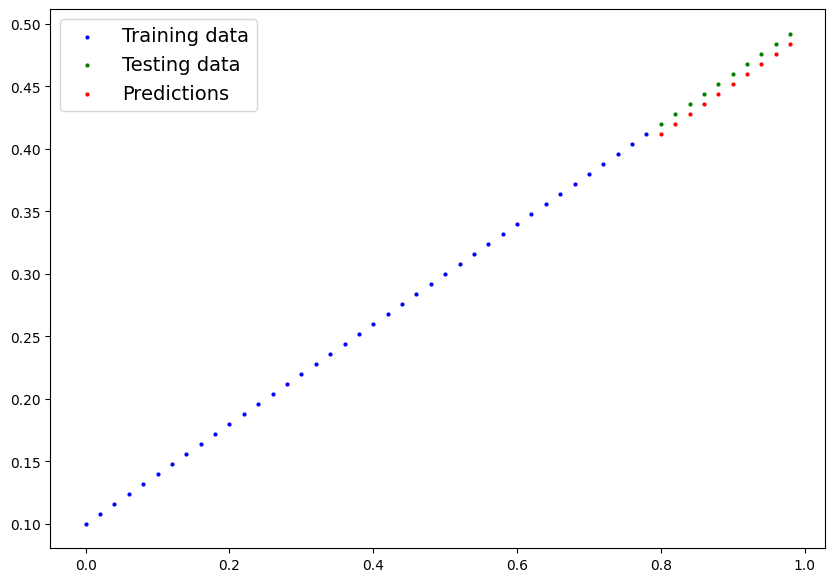

In [184]:
plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),predictions=y_preds_new.cpu())

In [188]:
MODEL_NAME = '001_Model_1_putting_everything_together.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [195]:
loaded_model_1 = LinearRegressionModel_1()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.eval()
loaded_model_1.to(device)

LinearRegressionModel_1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [196]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0915], device='cuda:0'))])

In [204]:
# Make some predictions with our loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)

y_preds_new.to(device) == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')